In [61]:
!pip install konlpy
!pip install wordcloud
!pip install jpype1
!pip install nltk

In [1]:
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import pandas as pd
import re
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from utils import crawler

In [2]:
title_text=[]
link_text=[]
source_text=[]
date_text=[]
contents_text=[]
result={}

In [3]:
RESULT_PATH = os.getcwd()
now = datetime.now()

In [4]:
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stop_words = [line.rstrip('\n') for line in list_file]
# stop_words = ['있다','있는','같은','있으며','입니다','인해','아닌','인한','있어','전자', '삼성']

In [28]:
df = crawler(10,"삼성전자","2","2020.06.24","2020.06.24") 

1
11
21
31
41
51
61
71
81
91


In [29]:
df

,date,title,source,contents,link
0,1일,"'강진성 역전 결승타' 선두 NC, KT에 3:2 승리로 5연승",스포츠타임스,"크게 이겼고, 고척돔에선 롯데가 박세웅의 호투를 발판으로 키움에 4-2로 승리했다....",http://www.thesportstimes.co.kr/news/articleVi...
1,1일,"두산을 가장 잘아는 LG 김현수, 유희관을 두들겼다",윈터뉴스 코리아,(2홈런) 6실점으로 무너진 한화 우완 선발 요원 장시환은 6패째(2승)를 기록했다...,http://www.winternewskorea.com/news/articleVie...
2,1일,"삼성SDS, 2분기 영업익 1,967억원…전년비 24% 감소",중소기업뉴스,"삼성SDS는 24일 잠정실적 공시를 통해 2분기 매출액 2조 5666억원, 영업이익...",http://news.kbiz.or.kr/news/articleView.html?i...
3,1일,"SK 와이번스 시즌 두번째 3연승, 꼴찌 한화와 6.5경기 차",경기신문,32승 1무 33패로 7위를 유지한 kt는 6위 삼성 라이온즈(34승 32패)와의 ...,https://www.kgnews.co.kr/news/article.html?no=...
4,1일,"'4승' 박세웅 ""홈런 개의치 않고 공격적인 투구 펼칠 것""",스포츠투데이,"박세웅은 경기 후 ""앞서 경기(삼성 라이온즈전)는 홈런을 안 맞고 볼넷을 많이 내줬...",http://stoo.asiae.co.kr/article.php?aid=662421...
...,...,...,...,...,...
495,2020.06.24.,"[재산·건강상태부터 성향평가·친분관계까지] 삼성중공업, 노조설립 막으려 ...",매일노동뉴스,지난해 12월 서울중앙지법은 삼성이 무노조 경영을 유지하려고 미전실 주도로 조직적인...,http://www.labortoday.co.kr/news/articleView.h...
496,2020.06.24.,경기도 법인지방소득세 작년보다 30% 감소...'반도체 실적 부진',아주경제,"""코로나19 피해 극복을 위해 272개 법인에 대해 71억 원 납기 연장"" 김문기 ...",http://www.ajunews.com/view/20200624075711045
497,2020.06.24.,"[22일 이슈] 15종목 상한가, 셀트리온 '램시마' 효과 봤다, 현대건설우·쌍용...",금강일보,"◎ 23일 네이버 금융에서 가장 많이 조회된 종목 30개 셀트리온, 쌍용차, 삼성전...",http://www.ggilbo.com/news/articleView.html?id...
498,2020.06.24.,"대법원, 검찰의 '이재용 파기환송심 재판부 기피신청' 재항고 본격 심리...이...",녹색경제신문,이재용 삼성전자 부회장의 국정농단 파기환송심 재판부를 바꿔달라고 요청한 특검의 기피...,http://www.greened.kr/news/articleView.html?id...


In [30]:
def make_wordcloud(word_count, title_list):
    twitter = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
#         print(morph)
#         print('-' * 30)
 
#     print(sentences_tag)
#     print('\n' * 3)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if word not in stop_words:
                if tag in ['Noun', 'Adjective']:
#                 if tag in ['Adjective']:
#                 if tag in ['Noun']:
                    noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
#     print(tags)
 
    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', background_color='white', width=800, height=600)
#     print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    return tags

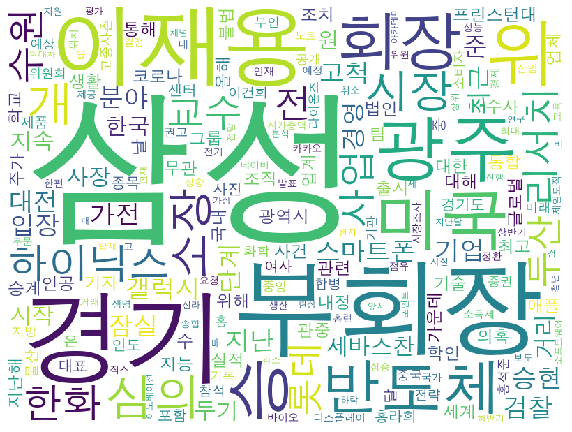

In [31]:
tags = make_wordcloud(1000, df['contents'].tolist())

In [32]:
tags

[('삼성', 591),
 ('부회장', 150),
 ('경기', 142),
 ('이재용', 133),
 ('위', 93),
 ('광주', 86),
 ('미국', 80),
 ('승', 73),
 ('회장', 69),
 ('반도체', 60),
 ('심의', 59),
 ('개', 58),
 ('소장', 55),
 ('시장', 52),
 ('하이닉스', 50),
 ('한화', 49),
 ('리서치', 49),
 ('사업', 48),
 ('수원', 47),
 ('전', 45),
 ('교수', 45),
 ('롯데', 44),
 ('두산', 44),
 ('스마트폰', 43),
 ('지난', 42),
 ('검찰', 42),
 ('대전', 41),
 ('최근', 41),
 ('준', 41),
 ('분야', 41),
 ('고척', 40),
 ('가전', 40),
 ('승현', 40),
 ('경영', 39),
 ('기업', 39),
 ('갤럭시', 39),
 ('단계', 38),
 ('잠실', 37),
 ('입장', 37),
 ('세바스찬', 37),
 ('사장', 37),
 ('지속', 36),
 ('원', 35),
 ('시작', 35),
 ('거리', 35),
 ('두기', 34),
 ('한국', 34),
 ('프린스턴대', 34),
 ('대한', 33),
 ('관중', 33),
 ('조치', 33),
 ('무관', 33),
 ('조직', 33),
 ('내정', 33),
 ('광역시', 32),
 ('수사', 32),
 ('기술', 32),
 ('통합', 31),
 ('사건', 30),
 ('인공', 30),
 ('지능', 30),
 ('코로나', 29),
 ('그룹', 29),
 ('관련', 29),
 ('최고', 29),
 ('출시', 29),
 ('생활', 28),
 ('날', 27),
 ('실적', 27),
 ('애플', 27),
 ('가운데', 27),
 ('팀', 26),
 ('위해', 26),
 ('법인', 26),
 ('기자', 26),
 ('글로벌', 26)